<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h1>Data Generation, Naive Bayes Classification and Gaussian Mixture Models</h1>
Summer 2021
</center>

<center>
<b> Due on: 12 July 2021, 23:30 ADT  </b> 
</center>

Submit your assignment as a single `.ipynb` file **(please do not zip it when submitting to brightspace)** including your answers to both the math and the experimental questions, in the correct order. Use markdown syntax to format your answers.

Note: in solving the math questions, aim for general (symbolic) solutions and substitute the specific numbers at the end. This demonstrates a solid understanding of the key concepts. 
You can answer the math questions in two ways:
*   **Use LaTeX to typeset the equations**. Section H of [this LaTeX reference sheet](http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf) is a good reference. Here is another [LaTeX reference sheet](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).
The equations in the questions are typeset in LaTeX, so you can use them as examples. 
*   **Use neat handwriting**, scan your solution using [AdobeScan](https://acrobat.adobe.com/ca/en/mobile/scanner-app.html), or [Dropbox](https://www.dropbox.com/doc-scanner-app) on your mobile phone, upload the image file, and embed it in your solution notebook. To this end (1) create an empty Markdown cell. 2) Drag-and-drop the image file into the empty Markdown cell, or click on the image icon at the top of the cell and select the image file. The Markdown code that will embed the image then appears.   


Your answers to the experimental questions should be in your solution notebook, in the form of code and text cells, using markdown for your text responses. **You should also include the results of running your code. This means that you must not clear the output produced by your program**.

The marking criteria are described in rubrics. There are two rubrics, for math questions, and for experimental questions, respectively. 

You can submit multiple editions of your assignment. Only the last one will be marked. It is recommended to upload a complete submission, even if you are still improving it, so that you have something into the system if your computer fails for whatever reason.  

**IMPORTANT**: PLEASE NAME YOUR PYTHON NOTEBOOK FILE AS: 
* `<LAST_NAME>-<FIRST_NAME>-Assignment-N.ipynb`

for example: **Soto-Axel-Assignment-3.ipynb** \\


## **1. Data generation** (2 pts)









 

In this question we are going to generate data corresponding to a mixture of Gaussians.

a) Program a generative model of red blood cell counts for samples in a blood bank, knowing
that males have a mean equal to 5.4 million cells/μL (with a standard deviation equal to 0.28
million cells/μL) and females have a mean equal to 4.2 million cells/μL (with a standard
deviation equal to 0.2 million cells/μL). Keep in mind that donations by women are more
common, as only 40% of the donations have been made by men.

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n):
  data = []
  gender = []
  for x in range(n):
    if np.random.uniform() < 0.6:
      gender.append("f")
      data.append(np.random.normal(loc = 4.2, scale = 0.2))
    else:
      gender.append("m")
      data.append(np.random.normal(loc = 5.4, scale = 0.28))
  return np.array(data), np.array(gender)



b) Generate a population of 10,000 individuals and plot the joint histogram.

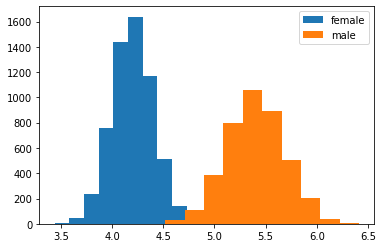

In [99]:
data, gender = generate_data(10000)
plt.hist(data[gender == "f"], label = "female")
plt.hist(data[gender == "m"], label = "male")
plt.legend()
plt.show()

## **2.Multi-label classification using Naive Bayes** (5 pts)

In this question you will implement Naive Bayes to classify the topic of newsgroup posts.This method works fairly well for certain text classification tasks. This is indeed the case for newsgroup post classification given that there are words that convey a strong indication of a post belonging to a certain topic.

You will make use of the 20 newsgroup Dataset, which can be found in  sklearn(The training subset has been fetched for you) . Utilize [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to convert the words to vector representations. Experiment with the parameters as needed.
>(Please refer [here](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting) for more details about sklearn implementation of Tf-idf)

In [100]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(remove=('headers','footers','quotes'),subset='train')
# removes whitespaces from data
remove_ws = lambda x: " ".join(x.split())
X_train = list(map(remove_ws,newsgroups_train.data))
y_train = newsgroups_train.target
# uncomment to know more about the dataset
#print(newsgroups_train.DESCR) 

a) First you will build a classifier on the above training set. You will be using [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn-naive-bayes-multinomialnb) from sklearn for this task. Make sure you account for the zero counts (smoothing), so that a prediction is not penalized just because it uses a word that is not present in the training set. 

In [101]:
# Code below (Transform words to feature vectors using tf-idf) 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = TfidfVectorizer()
vectors_train = vectorizer.fit_transform(X_train)
print(vectors_train.shape)


(11314, 101631)


In [102]:
# Code below (Use the tranformed features to train the classifier)

model = MultinomialNB().fit(vectors_train, y_train)


How well does the classifier fits the training set ?

In [103]:
from sklearn.metrics import classification_report

training_pred = model.predict(vectors_train)
print(classification_report(y_train, training_pred, target_names = newsgroups_train.target_names))


                          precision    recall  f1-score   support

             alt.atheism       0.97      0.34      0.51       480
           comp.graphics       0.94      0.83      0.88       584
 comp.os.ms-windows.misc       0.90      0.81      0.86       591
comp.sys.ibm.pc.hardware       0.78      0.91      0.84       590
   comp.sys.mac.hardware       0.97      0.87      0.92       578
          comp.windows.x       0.93      0.93      0.93       593
            misc.forsale       0.94      0.81      0.87       585
               rec.autos       0.94      0.83      0.88       594
         rec.motorcycles       0.98      0.86      0.92       598
      rec.sport.baseball       0.99      0.89      0.94       597
        rec.sport.hockey       0.65      0.95      0.77       600
               sci.crypt       0.76      0.95      0.84       595
         sci.electronics       0.96      0.80      0.87       591
                 sci.med       0.98      0.89      0.93       594
         

b) For testing fetch the test subset by passing `subset="test"` in the code above. Plot the confusion matrix and report the classification metrics (precision, recall, f1-score) for all the categories. Sklearn's [classfication report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn-metrics-classification-report) is a useful utility for this task.
> Note : Remember to apply identical tranformations (text cleaning, Tf-idf vectorization etc) to the test subset as the training subset before inference.





In [104]:
newsgroups_test = fetch_20newsgroups(remove=('headers','footers','quotes'),subset='test')
# removes whitespaces from data
remove_ws = lambda x: " ".join(x.split())
X_test = list(map(remove_ws,newsgroups_test.data))
y_test = newsgroups_test.target

vectors_test = vectorizer.transform(X_test)
testing_pred = model.predict(vectors_test)


                          precision    recall  f1-score   support

             alt.atheism       0.81      0.07      0.13       319
           comp.graphics       0.72      0.62      0.67       389
 comp.os.ms-windows.misc       0.70      0.50      0.59       394
comp.sys.ibm.pc.hardware       0.55      0.75      0.64       392
   comp.sys.mac.hardware       0.81      0.61      0.69       385
          comp.windows.x       0.83      0.74      0.78       395
            misc.forsale       0.86      0.69      0.77       390
               rec.autos       0.82      0.68      0.74       396
         rec.motorcycles       0.89      0.63      0.73       398
      rec.sport.baseball       0.95      0.69      0.80       397
        rec.sport.hockey       0.59      0.90      0.71       399
               sci.crypt       0.47      0.80      0.59       396
         sci.electronics       0.77      0.43      0.55       393
                 sci.med       0.86      0.63      0.73       396
         

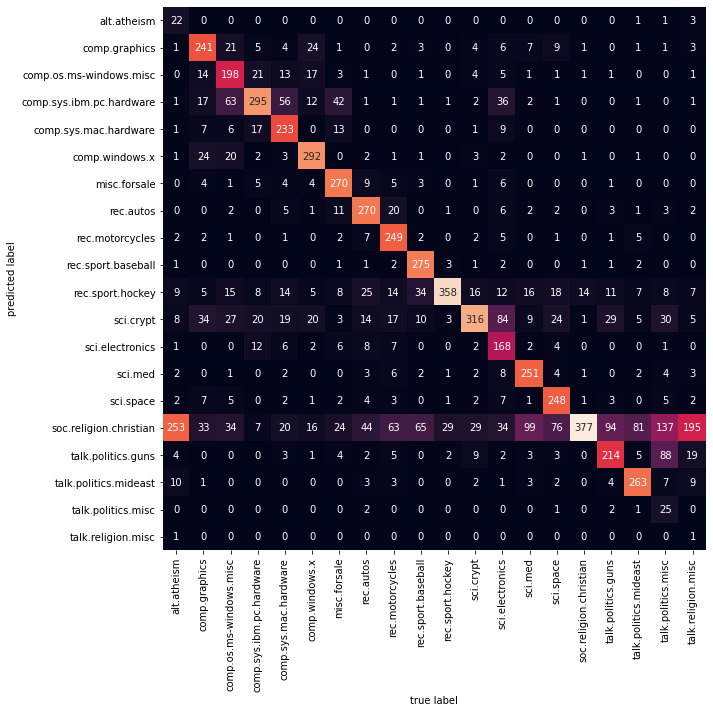

In [105]:
# Referred Tutorial 5

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

mat = confusion_matrix(y_test, testing_pred)

plt.subplots(figsize = (10, 10))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=newsgroups_train.target_names, yticklabels=newsgroups_train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')
print(classification_report(y_test, testing_pred, target_names = newsgroups_train.target_names))


c) Which category is the model best predictor for? 

Answer:  Baseball since its precision value is high. 




Report the top-10 most representative words or features for that category ie. top-10 words with the highest
$P(X_{i}|category)$ . We'll use the *get_feature_names()* method of  [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and *feature_log_prob_* attribute of [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn-naive-bayes-multinomialnb) to answer this question.These have been combined in the "show_top10" function below. You are encouraged to find out how this function works and use it to answer the question.

In [107]:
categories = newsgroups_train.target_names #categories present in the Newsgroup dataset. 
def show_top10(classifier, vectorizer, categories):
  "Returns the top 10 most representative features for each class"
  feature_names = np.asarray(vectorizer.get_feature_names())
  for i, category in enumerate(categories):
    top10 = np.argsort(classifier.feature_log_prob_[i])[-10:]
    print("%s: %s" % (category, " ".join(feature_names[top10])))

In [108]:
# Calling method to print top 10 words from every category

show_top10(model, vectorizer, categories)


alt.atheism: not in and it you is that of to the
comp.graphics: you in graphics it is for of and to the
comp.os.ms-windows.misc: file of you for and is it to windows the
comp.sys.ibm.pc.hardware: with scsi for of drive is it and to the
comp.sys.mac.hardware: that apple for of mac it and is to the
comp.windows.x: for this it in of is and window to the
misc.forsale: or in shipping offer 00 to and sale the for
rec.autos: is that in it of you and to car the
rec.motorcycles: for that in of you it and bike to the
rec.sport.baseball: year was is that of in and to he the
rec.sport.hockey: hockey team that game of he and in to the
sci.crypt: in be it is that key and of to the
sci.electronics: that for in it you is and of to the
sci.med: this you that in it and is to of the
sci.space: for that it is in and space of to the
soc.religion.christian: you it in god and is that to of the
talk.politics.guns: it gun is you in and that of to the
talk.politics.mideast: it is israel that you in and to of th

d) Select any 10 samples from the test-set, using the same trained model in (a)  predict the top-2 news category for each of the 10 samples. You can utilize the [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.predict_proba) method of the classifier for this task.

In [109]:
print(classification_report(y_test, testing_pred, target_names = newsgroups_train.target_names))
# The top 2 news category will be the ones with the highest precision. 


                          precision    recall  f1-score   support

             alt.atheism       0.81      0.07      0.13       319
           comp.graphics       0.72      0.62      0.67       389
 comp.os.ms-windows.misc       0.70      0.50      0.59       394
comp.sys.ibm.pc.hardware       0.55      0.75      0.64       392
   comp.sys.mac.hardware       0.81      0.61      0.69       385
          comp.windows.x       0.83      0.74      0.78       395
            misc.forsale       0.86      0.69      0.77       390
               rec.autos       0.82      0.68      0.74       396
         rec.motorcycles       0.89      0.63      0.73       398
      rec.sport.baseball       0.95      0.69      0.80       397
        rec.sport.hockey       0.59      0.90      0.71       399
               sci.crypt       0.47      0.80      0.59       396
         sci.electronics       0.77      0.43      0.55       393
                 sci.med       0.86      0.63      0.73       396
         

## **3. Gaussian Mixture Model** (3 pts)



It’s year 2120 and you work as a space taxi driver. One day, you suddenly get lost and find a
new small inhabited planet, which looks like a so far unknown civilization. You meet the planet
prime minister who explains to you that different alien races joined to live on this planet
peacefully. Although the different races look similar, the prime minister explains: “It’s not
clear-cut, but the race can be fairly well distinguished by looking at an alien's height and weight”.
You spent a good amount of time chatting and laughing with the prime minister until you
realized that you had passengers waiting to be picked up.

A few years later, you find that there is a lot of interest in knowing more about this planet, how
many races there are, and what their different races look like. You never managed to find that
planet again (as you know, planets move around). You are clearly not good at memorizing data,
but luckily, the prime minister shared with you the last census data (aliens.csv), which contains
aliens’ heights and weights in meters and kilograms, respectively. Would you be able to infer
how many races there are and what their characteristics are?

In [81]:
# Use this to import the aliens.csv from your local directory.
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
aliens = pd.read_csv(io.StringIO(uploaded['aliens.csv'].decode('utf-8')),names=['height','weight'])

Saving aliens.csv to aliens.csv


a) Run a [Gaussian Mixture Model](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn-mixture-gaussianmixture), so that you can identify the different races in the civilization.
Vary the number of components from 2 to 7. Use the [Akaike information criterion](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.aic) (AIC) to
provide a metric of the goodness of the approximation for each. Indicate the most likely number
of races.

In [113]:
# Referred Tutorial 6

# for component in numberOfComponents:
#   model = GaussianMixture(n_components = component).fit(aliens)

# use the sklearn make_blob function to generate the dataset
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice

# Generate your dataset here
blobs = make_blobs(n_samples=100)
# blobs with varied variances
varied = make_blobs(n_samples=100,
                             cluster_std=[1.0, 2.5, 0.5]
                    )

datasets = [ 
            (varied, {'eps': .18, 'n_neighbors': 2, 'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
            (blobs, {})
]


b) Using the most probable number of races (# gaussians) based on AIC, plot in a scatter plot of
all your points (heights and weights) where the color of each point is defined by the Gaussian
with the highest posterior probability.

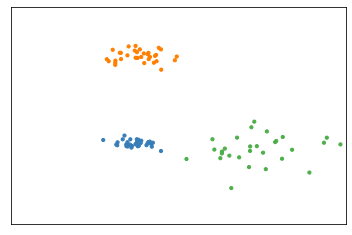

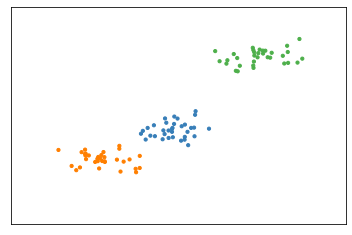

In [115]:
# Referred Tutorial 6

# import the Gaussian Mixture Model and train it on your data
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# creat the Gaussian model
gmm = GaussianMixture(n_components=3, covariance_type='full')
# fit it on the data
clustering_algorithms = (
        ('Gaussian\nMixture', gmm)
)
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    gmm.fit(X)
    y_pred = gmm.predict(X)

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.show()


c) Report the parameters of the gaussians so that you can describe the main characteristics for
each race.

In [117]:
# Referred URL: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

print(gmm.weights_)
print(gmm.means_)
print(gmm.covariances_)
print(gmm.precisions_)
print(gmm.precisions_cholesky_)
print(gmm.converged_)
print(gmm.n_iter_)
print(gmm.lower_bound_)


[0.34084767 0.32915233 0.33      ]
[[-0.07771767 -0.33220787]
 [-1.13398718 -1.00747046]
 [ 1.21134669  1.34801069]]
[[[ 0.06351178  0.01015891]
  [ 0.01015891  0.03357122]]

 [[ 0.09178521 -0.01210958]
  [-0.01210958  0.02450443]]

 [[ 0.11693396  0.01761933]
  [ 0.01761933  0.02767762]]]
[[[16.54598683 -5.00694155]
  [-5.00694155 31.30256182]]

 [[11.65488789  5.75960217]
  [ 5.75960217 43.65522545]]

 [[ 9.45915859 -6.02161681]
  [-6.02161681 39.96357783]]]
[[[ 3.96801097 -0.89491663]
  [ 0.          5.59486924]]

 [[ 3.3007577   0.8717147 ]
  [ 0.          6.60721011]]

 [[ 2.92435218 -0.95253498]
  [ 0.          6.32167524]]]
True
2
-0.8986087136900826
